### IMPORTING LIBRARIES AND PACKAGES

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [261]:
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

### LOADING AND VIEWING DATASET

In [262]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [263]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [264]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [265]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [266]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### DEALING WITH NaN VALUES

Cabin column has lots of  missing values and Ticket column is too noisy to be useful. So we can probably drop both these features without affecting the performance of our model.

In [267]:
train.drop(['Cabin','Ticket'],axis=1,inplace=True)
test.drop(['Cabin','Ticket'],axis=1,inplace=True)

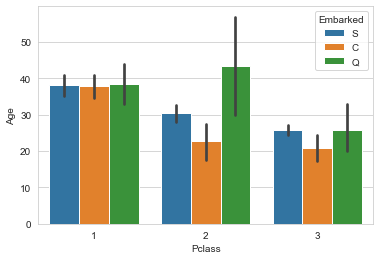

In [268]:
sns.barplot('Pclass','Age',data=train,hue='Embarked')

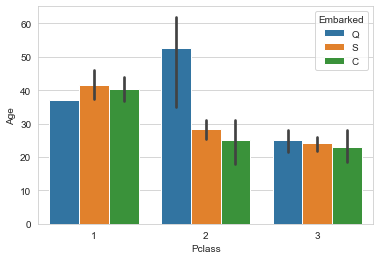

In [269]:
sns.barplot('Pclass','Age',data=test,hue='Embarked')

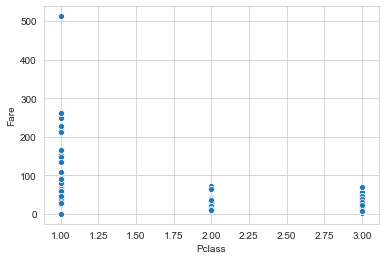

In [270]:
sns.scatterplot('Pclass','Fare',data=test)

Age column varying with Pclass=1 and Pclass=3. For Pclass=2, Age column is also varying with Embarked column. So, we can fill missing values of Age column with the means according to Pclass and Embarked.



In [271]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [272]:
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

In [273]:
train[train['Pclass']==2][train['Embarked']=='Q']['Age'].mean()

43.5

In [274]:
train[train['Pclass']==2][train['Embarked']=='S']['Age'].mean()

30.38673076923077

In [275]:
train[train['Pclass']==2][train['Embarked']=='C']['Age'].mean()

22.766666666666666

In [276]:
test[test['Pclass']==2][test['Embarked']=='Q']['Age'].mean()

52.666666666666664

In [277]:
test[test['Pclass']==2][test['Embarked']=='S']['Age'].mean()

28.268684210526317

In [278]:
test[test['Pclass']==2][test['Embarked']=='C']['Age'].mean()

25.11111111111111

In [279]:
test[test['Pclass']==1]['Age'].mean()

40.91836734693877

In [280]:
test[test['Pclass']==3]['Age'].mean()

24.02794520547945

In [281]:
def impute_age_train(age,pclass,embarked):
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==3:
            return 25
        else:
            if embarked=='Q':
                return 43.5 
            elif embarked=='S':
                return 30
            else:
                return 23
    else:
        return age

In [282]:
def impute_age_test(age,pclass,embarked):
    if pd.isnull(age):
        if pclass==1:
            return 41
        elif pclass==3:
            return 24
        else:
            if embarked=='Q':
                return 53 
            elif embarked=='S':
                return 28
            else:
                return 25
    else:
        return age

In [283]:
train['Age']= train[['Age','Pclass','Embarked']].apply(lambda x:impute_age_train(x[0],x[1],x[2]),axis=1)

In [284]:
test['Age']= test[['Age','Pclass','Embarked']].apply(lambda x:impute_age_test(x[0],x[1],x[2]),axis=1)

In [285]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [286]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [287]:
train.dropna(inplace=True)

In [288]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [289]:
fill_null=test[test['Pclass']==3]['Fare'].median() #The column in which Fare is null, Pclass=3

In [290]:
test['Fare'].fillna(fill_null,inplace=True)

In [291]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


In [292]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


### SETTING INDEX

In [293]:
train.set_index('PassengerId',inplace=True)

In [294]:
test.set_index('PassengerId',inplace=True)

In [295]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [296]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


### PLOTTING AND VISUALIZING DATA

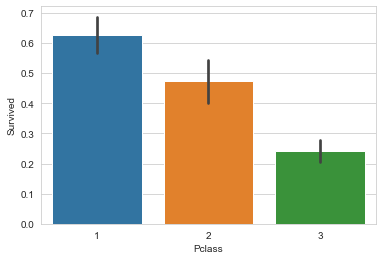

In [297]:
sns.barplot('Pclass','Survived',data=train)

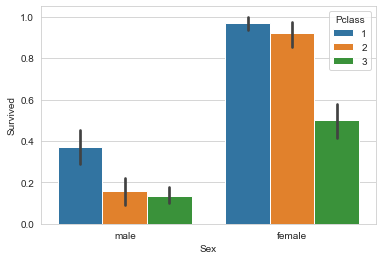

In [298]:
sns.barplot('Sex','Survived',hue='Pclass',data=train)

It appears that people is Pclass=1 are more likely is survive in both male and female. Females are more likely to survive as compared to males.

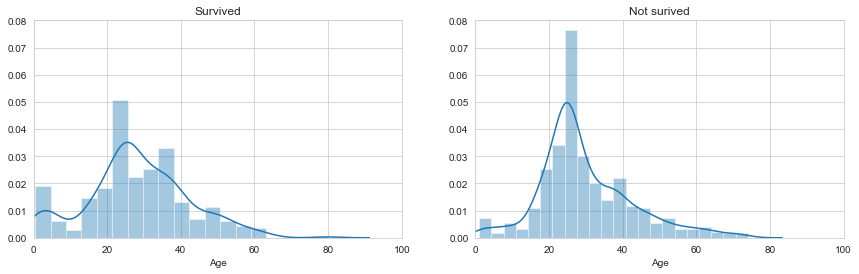

In [299]:
survived_age= train[train['Survived']==1]['Age']
not_survived_age= train[train['Survived']==0]['Age']
plt.subplot(1,2,1)
sns.distplot(survived_age)
plt.axis([0,100,0,0.08])
plt.title('Survived')
plt.subplot(1,2,2)
plt.subplots_adjust(right=2)
plt.title('Not surived')
plt.axis([0,100,0,0.08])

sns.distplot(not_survived_age)

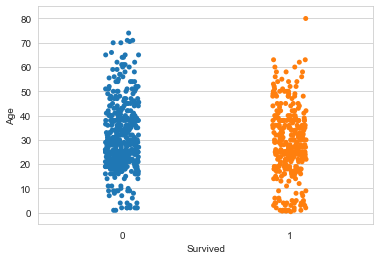

In [300]:
sns.stripplot('Survived','Age',data=train)

It appears as though passengers in younger range of ages are more likely to survive as compared to that of older range of ages, as seen by clustering in stripplot and histogram. 

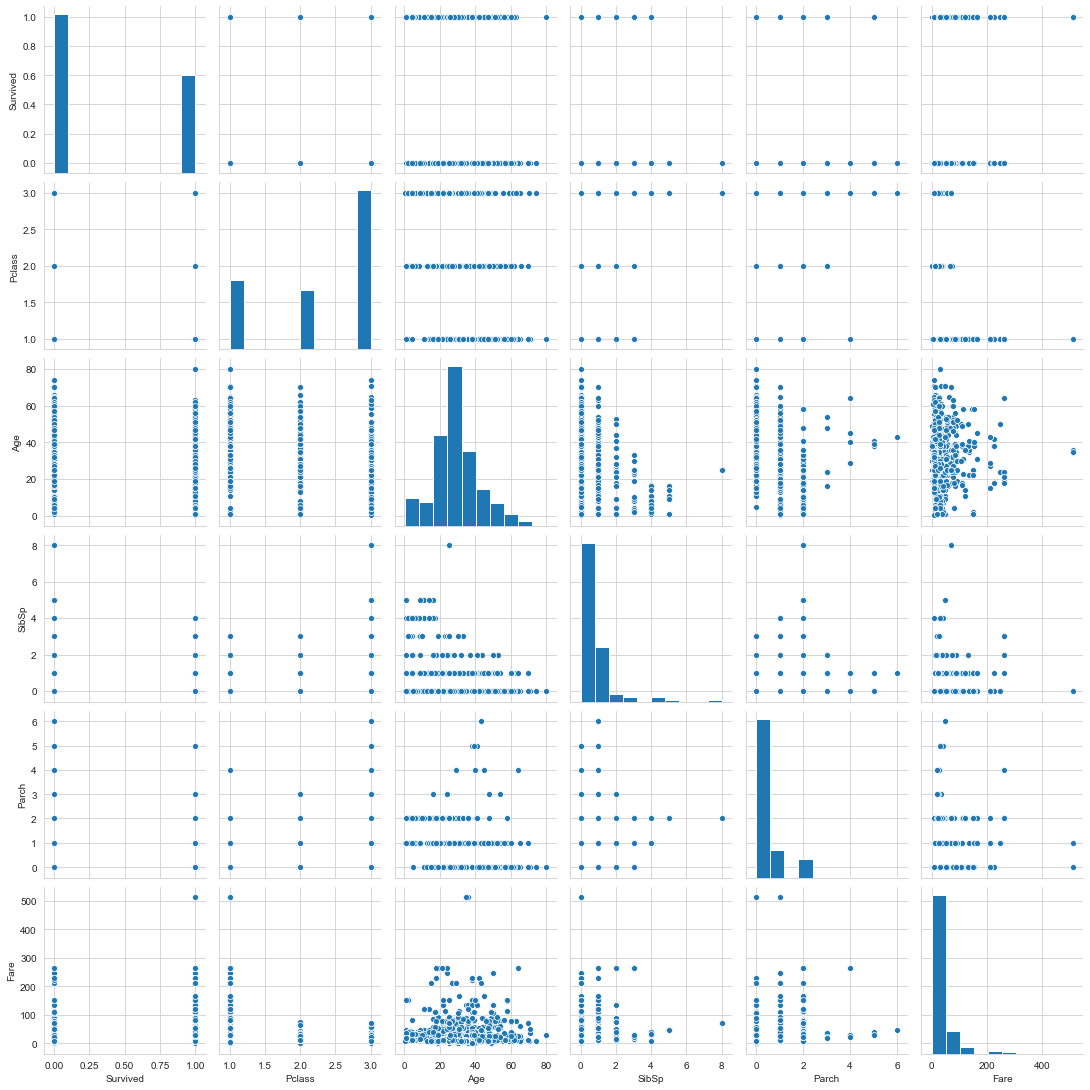

In [301]:
sns.pairplot(train)

In [302]:
train.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

### FEATURE ENGINEERING


Sex and Embarked are categorical coulmns. They need to be changed to numerical columns in order to perform classification in our  model. 

In [303]:
train=pd.get_dummies(train,columns=['Sex','Embarked'],drop_first=True)

In [304]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1


In [305]:
test=pd.get_dummies(test,columns=['Sex','Embarked'],drop_first=True)

In [306]:
test.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",34.5,0,0,7.8292,1,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,0,0,1
894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,1,1,0
895,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,1,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,0,0,1


In [307]:
train['FamSize']= train['SibSp']+train['Parch']+1
test['FamSize']= test['SibSp']+test['Parch']+1


In [308]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamSize
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0,2
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1,2
5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,1


In [309]:
train['IsAlone']= train['FamSize'].apply(lambda x:1 if x==1 else 0)
test['IsAlone']= test['FamSize'].apply(lambda x:1 if x==1 else 0)

In [310]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamSize,IsAlone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0,2,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1,2,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,1,1


In [311]:
for name in train['Name']:
    train['Title']=train['Name'].str.extract('([A-Za-z]+)\.')
for name in test['Name']:
    test['Title']=test['Name'].str.extract('([A-Za-z]+)\.')
        

In [312]:
train['Title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Capt          1
Lady          1
Don           1
Ms            1
Countess      1
Jonkheer      1
Mme           1
Name: Title, dtype: int64

In [313]:
replacement={'Dr':'Other','Rev':'Other','Major':'Other','Col':'Other','Mlle':'Other','Sir':'Other','Jonkheer':'Other','Ms':'Other','Capt':'Other','Countess':'Other','Don':'Other','Lady':'Other','Mme':'Other'}

In [314]:
train.replace({'Title':replacement},inplace=True)
test.replace({'Title':replacement},inplace=True)

In [315]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [316]:
from sklearn.preprocessing import LabelEncoder

In [317]:
train['Title']=LabelEncoder().fit_transform(train['Title'])
test['Title']=LabelEncoder().fit_transform(test['Title'])

In [318]:
train['Title'].unique()

array([2, 3, 1, 0, 4])

In [319]:
train.drop('Name',axis=1,inplace=True)

In [320]:
test.drop('Name',axis=1,inplace=True)

In [321]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamSize,IsAlone,Title
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1,2,0,2
2,1,1,38.0,1,0,71.2833,0,0,0,2,0,3
3,1,3,26.0,0,0,7.9250,0,0,1,1,1,1
4,1,1,35.0,1,0,53.1000,0,0,1,2,0,3
5,0,3,35.0,0,0,8.0500,1,0,1,1,1,2


In [322]:
test.sample(7)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamSize,IsAlone,Title
PassengerId,,,,,,,,,,,
1202,3,18.0,0,0,8.6625,1,0,1,1,1,3
1056,2,41.0,0,0,13.0000,1,0,1,1,1,5
1105,2,60.0,1,0,26.0000,0,0,1,2,0,4
973,1,67.0,1,0,221.7792,1,0,1,2,0,3
1218,2,12.0,2,1,39.0000,0,0,1,4,0,2
1022,3,32.0,0,0,8.0500,1,0,1,1,1,3
1037,3,31.0,3,0,18.0000,1,0,1,4,0,3


### FEATURE RESCALING

Age and Fare features deviate heavily from other features. We can scale them to avoid problems while modelling.

In [323]:
from sklearn.preprocessing import StandardScaler

In [324]:
train_cols_to_scale= train[['Age','Fare']]
test_cols_to_scale= test[['Age','Fare']]

In [325]:
train_scaled_feat=StandardScaler().fit_transform(train_cols_to_scale)
test_scaled_feat=StandardScaler().fit_transform(test_cols_to_scale)

In [326]:
train_scaled_columns=pd.DataFrame(train_scaled_feat,columns=['Age','Fare'],index=train.index)
test_scaled_columns=pd.DataFrame(test_scaled_feat,columns=['Age','Fare'],index=test.index)

In [327]:
train.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=889)

In [67]:
train['Age']=train_scaled_columns['Age']
train['Fare']=train_scaled_columns['Fare']
test['Age']=test_scaled_columns['Age']
test['Fare']=test_scaled_columns['Fare']




In [328]:
#train.isnull().sum()

In [329]:
test.sample(4)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamSize,IsAlone,Title
PassengerId,,,,,,,,,,,
1041,2,30.0,1,1,26.0000,1,0,1,3,0,5
1283,1,51.0,0,1,39.4000,0,0,1,2,0,4
1010,1,36.0,0,0,75.2417,1,0,0,1,1,3
1045,3,36.0,0,2,12.1833,0,0,1,3,0,4


### MODEL FITTING, OPTIMIZING AND PREDICTING

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

In [331]:
from sklearn.metrics import make_scorer,accuracy_score # To evaluate model performance

In [332]:
from sklearn.model_selection import GridSearchCV # To find optimal parameters for the model

###### Defining features in train/test set

In [333]:
X_train= train.drop('Survived',axis=1)
y_train=train['Survived']
X_test=test

###### Validation dataset

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
X_training,X_valid,y_training,y_valid= train_test_split(X_train,y_train,test_size=0.2)

In [338]:
X_training.shape

(711, 11)

In [339]:
y_training.shape

(711,)

###### Logistic Regression Model

In [340]:
lm=LogisticRegression()

In [341]:
parameters_lm={'fit_intercept':[True,False],'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter' :[50,100,150,200],'warm_start':[True,False]}

In [342]:
grid_lm= GridSearchCV(lm,parameters_lm,scoring=make_scorer(accuracy_score))

In [343]:
grid_lm.fit(X_training,y_training)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [50, 100, 150, 200],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return

In [344]:
lm=grid_lm.best_estimator_

In [345]:
lm.fit(X_training,y_training)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [346]:
pred_lm= lm.predict(X_valid)

In [347]:
acc_lm=accuracy_score(y_valid,pred_lm)

In [348]:
print('The score for logistic regression is:',acc_lm)

The score for logistic regression is: 0.7808988764044944


###### KNeighbors Model

In [349]:
knn=KNeighborsClassifier()

In [350]:
param_knn={'n_neighbors':[2,3,5,10,15],'weights':['uniform','distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':[10,20,30,50]}

In [351]:
grid_knn= GridSearchCV(knn,param_knn,scoring=make_scorer(accuracy_score))

In [352]:
grid_knn.fit(X_training,y_training)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 50],
                         'n_neighbors': [2, 3, 5, 10, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(accuracy_score), verbose=0)

In [353]:
knn=grid_knn.best_estimator_

In [354]:
knn.fit(X_training,y_training)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [355]:
pred_knn= knn.predict(X_valid)

In [356]:
acc_knn=accuracy_score(y_valid,pred_knn)

In [357]:
print('The score for KNeighbors model is:',acc_knn)

The score for KNeighbors model is: 0.6966292134831461


###### DECISION TREE CLASSIFIER

In [358]:
dtree=DecisionTreeClassifier()

In [359]:
param_dtree={'criterion' : ["gini", "entropy"],'splitter':['best','random'],'max_features':['auto','sqrt','log2']}

In [360]:
grid_dtree= GridSearchCV(dtree,param_dtree,scoring=make_scorer(accuracy_score))

In [361]:
grid_dtree.fit(X_training,y_training)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [362]:
dtree=grid_dtree.best_estimator_

In [363]:
dtree.fit(X_training,y_training)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [364]:
pred_tree=dtree.predict(X_valid)

In [365]:
acc_dtree=accuracy_score(y_valid,pred_tree)

In [366]:
print('The score for Decision tree is:',acc_dtree)

The score for Decision tree is: 0.7528089887640449


###### RANDOM FOREST MODEL

In [367]:
rfc=RandomForestClassifier()

In [368]:
param_rfc={'n_estimators':[4,5,6,7,8,9,10,15,50,100],'criterion':['giny','entropy'],'max_features':['auto','sqrt','log2'],'max_depth':[2,3,5,10],'min_samples_split':[2,3,5,10]}

In [369]:
grid_rfc=GridSearchCV(rfc,param_rfc,scoring=make_scorer(accuracy_score))

In [370]:
grid_rfc.fit(X_training,y_training)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              random_state=None, verbose=0,
                                   

In [371]:
rfc=grid_rfc.best_estimator_

In [372]:
rfc.fit(X_training,y_training)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [373]:
pred_rfc=rfc.predict(X_valid)

In [374]:
acc_rfc=accuracy_score(y_valid,pred_rfc)

In [375]:
print('The score for Random Forest is:',acc_rfc)

The score for Random Forest is: 0.8089887640449438


   ###### SVC

In [376]:
svc=SVC()

In [377]:
params_svc={'kernel':['rbf','linear'],'probability':[True,False],'verbose':[True]}

In [378]:
grid_svc= GridSearchCV(svc,params_svc,scoring=make_scorer(accuracy_score))

In [379]:
grid_svc.fit(X_training,y_training)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['rbf', 'linear'],
                         'probability': [True, False], 'verbose': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(accuracy_score), verbose=0)

In [380]:
svc=grid_svc.best_estimator_

In [381]:
svc.fit(X_training,y_training)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)

In [382]:
pred_svc=svc.predict(X_valid)

In [383]:
acc_svc=accuracy_score(y_valid,pred_svc)

In [384]:
print('The score for SVC is:',acc_svc)

The score for SVC is: 0.8033707865168539


###### LINEAR SVC

In [385]:
linsvc=LinearSVC()

In [386]:
param_linsvc={'multi_class':['ovr','crammer_singer' ],'fit_intercept':[True,False],'max_iter':[100,500,1000,1500]}

In [387]:
grid_linsvc=GridSearchCV(linsvc,param_linsvc,scoring=make_scorer(accuracy_score))

In [388]:
grid_linsvc.fit(X_training,y_training)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 500, 1000, 1500],
                         'multi_class': ['ovr', 'crammer_singer']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(accuracy_score), verbose=0)

In [389]:
linsvc=grid_linsvc.best_estimator_

In [390]:
linsvc.fit(X_training,y_training)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=False,
          intercept_scaling=1, loss='squared_hinge', max_iter=1500,
          multi_class='crammer_singer', penalty='l2', random_state=None,
          tol=0.0001, verbose=0)

In [391]:
pred_linsvc=linsvc.predict(X_valid)

In [392]:
acc_linsvc=accuracy_score(y_valid,pred_linsvc)

In [393]:
print('The score for Linear SVC is:',acc_linsvc)

The score for Linear SVC is: 0.8089887640449438


###### GaussianNB Model

In [394]:
gnb=GaussianNB()

In [395]:
params_gnb={}
grid_gnb=GridSearchCV(gnb,params_gnb,scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training,y_training)
gnb=grid_gnb.best_estimator_
gnb.fit(X_training,y_training)
pred_gnb=gnb.predict(X_valid)
acc_gnb=accuracy_score(y_valid,pred_gnb)

In [396]:
print('The score for GaussianNB is:',acc_gnb)

The score for GaussianNB is: 0.7696629213483146


## EVALUATING MODEL PERFORMANCES


In [397]:
model_performance=pd.DataFrame({'Model':['Logistic Regression','K Nearest Neighbors','Decision Tree','Random Forest','SVC','LinearSVC','Gaussian Naive Bayes'],
                              'Accuracy':[acc_lm,acc_knn,acc_dtree,acc_rfc,acc_svc,acc_linsvc,acc_gnb]})

In [398]:
model_performance.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
3,Random Forest,0.808989
5,LinearSVC,0.808989
4,SVC,0.803371
0,Logistic Regression,0.780899
6,Gaussian Naive Bayes,0.769663
2,Decision Tree,0.752809
1,K Nearest Neighbors,0.696629


## SUBMISSION

In [399]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [400]:
submission_pred=rfc.predict(X_test)

In [401]:
submission=pd.DataFrame({'PassengerId': test.index,
              'Survived':submission_pred})

In [402]:
submission.to_csv('titanic.csv',index=False)
print(submission.shape)

(418, 2)
